<a href="https://colab.research.google.com/github/haneulllll/Deeplearning/blob/main/Lab1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import sklearn

!python --version
print(torch.__version__)
print(sklearn.__version__)

Python 3.10.12
2.2.1+cu121
1.2.2


**라이브러리 불러오기**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**데이터 불러오기**

In [ ]:
wine_red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
print(wine_red.keys())
wine_red

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**DataFrame에서 x축과 y축 데이터 분리하기**

In [ ]:
x_data = wine_red.iloc[:, :-1]
y_data = wine_red.iloc[:,-1]

print(x_data.shape)
print(y_data.shape)

(1599, 11)
(1599,)


**전체 데이터를 훈련용/테스트용 데이터로 나누기**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, shuffle=True)

print(x_train.shape)  # 전체 데이터 중 75%는 훈련용 데이터
print(y_train.shape)
print(x_test.shape)  # 전체 데이터 중 25%는 테스트용 데이터
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


**normalization & tensor형으로 변환**

fit( ) : Gaussian 분포로 변환하기 위해 적절한 값으로 fitting해줌.

transform( ) : 데이터들을 Gaussian 분포로 변환함.

In [ ]:
print(y_test.shape)
print(y_train.shape)

(400,)
(1199,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_tensor = torch.FloatTensor(x_train_scaled)
y_train_tensor = torch.FloatTensor(y_train)  # y_test는 series형이기 때문에 tensor형으로 변환하기 전, 타입변환이 필요

x_test_tensor = torch.FloatTensor(x_test_scaled)
y_test_array = np.array(y_test) # y_test는 series형이기 때문에 tensor형으로 변환하기 전, 타입변환이 필요
y_test_tensor = torch.FloatTensor(y_test_array)

In [ ]:
print(y_test.shape)
print(y_train.shape)

(400,)
(1199,)


**데이터를 배치화하기(batchfy)**

In [ ]:
# 데이터 배치화
train_data = data_utils.TensorDataset(x_train_tensor, y_train_tensor)
dataloader = data_utils.DataLoader(train_data, batch_size = 50, shuffle=True, drop_last=True)

# 데이터 확인
for batch_idx, (x_batch, y_batch) in enumerate(dataloader) :
  print(batch_idx)
  print(x_batch.shape)
  print(y_batch.shape)
  break

0
torch.Size([50, 11])
torch.Size([50])


In [ ]:
# 훈련을 위한 Parameter 정의
input_size = 11
output_size = 1
learning_rate = 0.01
n_epochs = 100 # 훈련횟수(전체 데이터를 훑는 횟수)

**model 생성 & Loss Function 생성**

In [ ]:
# model 생성
model = nn.Linear(input_size, output_size)

# 손실함수 생성(loss function)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

**훈련 & 예측 & 평가**

In [ ]:
train_loss = []  # 훈련 MSE를 저장할 리스트
test_loss = []  # 테스트 MSE를 저장할 리스트

for epoch in range(n_epochs+1) :
  for idx, (x_batch, y_batch) in enumerate(dataloader) :
    # 학습
    model.train()  # train 모드로 전환
    optimizer.zero_grad()  # optimizer의 gradiant를 초기화
    y_pred = model(x_batch)  # Linear Layer 수행
    y_pred = y_pred.reshape(-1)  # 예측값과 실제값의 비교를 위해 차원을 통일
    loss_train = criterion(y_pred, y_batch)  # MSE 계산
    loss_train.backward()  # back propagation 수행
    optimizer.step()  # weight 업데이트

    # 평가
    model.eval()
    y_test_pred = model(x_test_tensor)
    y_test_pred = y_test_pred.reshape(-1)
    loss_test = criterion(y_test_pred, y_test_tensor)

  # 현재 epoch의 훈련 MSE와 테스트 MSE를 리스트에 추가
  train_loss.append(loss_train.item())
  test_loss.append(loss_test.item())
  print("epoch:{}, Loss_train:{:.2f}, Loss_test:{:.2f}".format(epoch, train_loss[-1], test_loss[-1]))

epoch:0, Loss_train:11.40, Loss_test:12.27
epoch:1, Loss_train:5.53, Loss_test:5.11
epoch:2, Loss_train:2.34, Loss_test:2.29
epoch:3, Loss_train:0.99, Loss_test:1.18
epoch:4, Loss_train:0.80, Loss_test:0.74
epoch:5, Loss_train:0.49, Loss_test:0.57
epoch:6, Loss_train:0.50, Loss_test:0.50
epoch:7, Loss_train:0.36, Loss_test:0.47
epoch:8, Loss_train:0.33, Loss_test:0.46
epoch:9, Loss_train:0.43, Loss_test:0.46
epoch:10, Loss_train:0.53, Loss_test:0.45
epoch:11, Loss_train:0.38, Loss_test:0.45
epoch:12, Loss_train:0.39, Loss_test:0.45
epoch:13, Loss_train:0.35, Loss_test:0.45
epoch:14, Loss_train:0.37, Loss_test:0.45
epoch:15, Loss_train:0.52, Loss_test:0.45
epoch:16, Loss_train:0.32, Loss_test:0.45
epoch:17, Loss_train:0.31, Loss_test:0.45
epoch:18, Loss_train:0.46, Loss_test:0.45
epoch:19, Loss_train:0.50, Loss_test:0.45
epoch:20, Loss_train:0.37, Loss_test:0.45
epoch:21, Loss_train:0.26, Loss_test:0.45
epoch:22, Loss_train:0.46, Loss_test:0.45
epoch:23, Loss_train:0.29, Loss_test:0.45


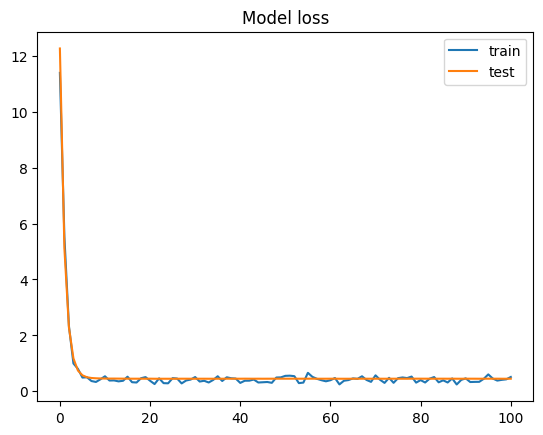

In [ ]:
# 시각화

plt.figure()
plt.plot(train_loss, label = 'train')
plt.plot(test_loss, label = 'test')
plt.title("Model loss")
plt.legend(loc='upper right')
plt.show()

**훈련을 통해 최적화한 가중치값들**

In [ ]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.0173, -0.1973, -0.0253,  0.0055, -0.0866,  0.0034, -0.0799, -0.0039,
                       -0.0587,  0.1516,  0.3217]])),
             ('bias', tensor([5.6462]))])